In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import quandl
# quandl.ApiConfig.api_key = 'CtnWv7rsELox3PWyD-UC'
# data = quandl.get("NSE/TATAGLOBAL")
# data.head(10)

In [3]:
data = pd.read_csv('NSE-TATAGLOBAL.csv')
data.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


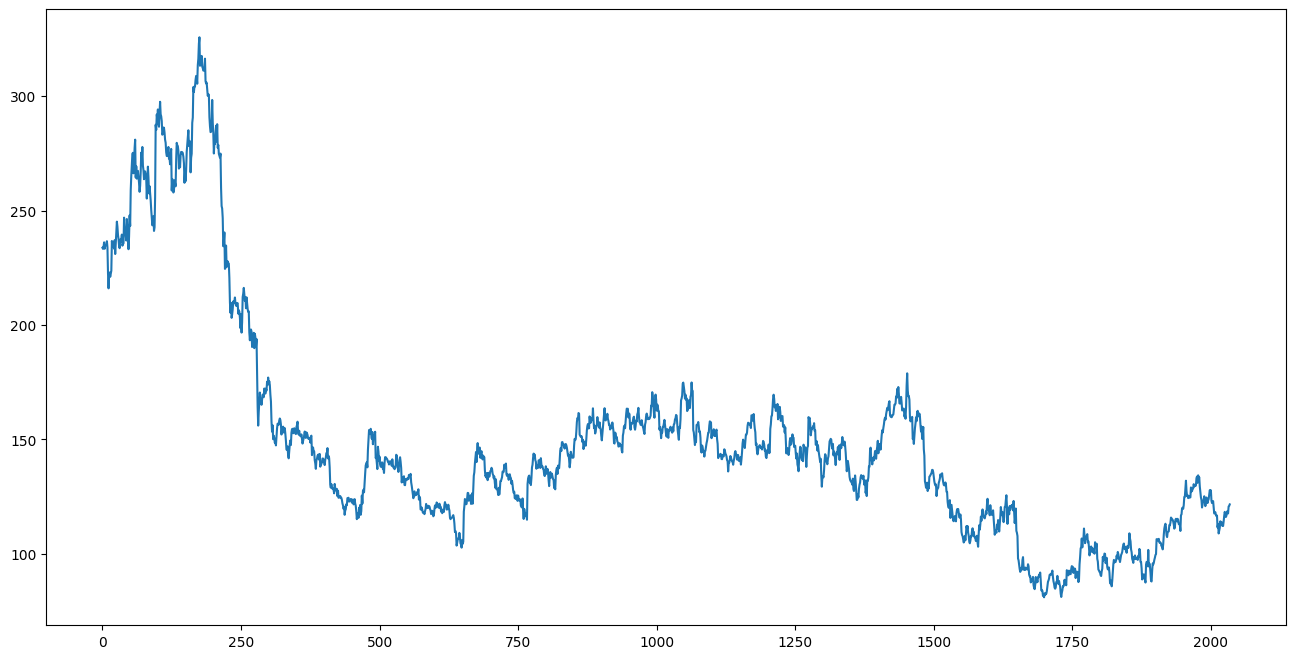

In [4]:
plt.figure(figsize=(16,8))
plt.plot(data['Close'], label='Closing Price')

# Classification Problem: Buy (+1) or sell (-1) the stock

In [5]:
data['Open - Close'] = data['Open'] - data['Close']
data['High - Low'] = data['High'] - data['Low']
data = data.dropna()

Input features to predict whether customer should buy or sell the stock

In [6]:
X = data[['Open - Close','High - Low']]
X.head(10)

,Open - Close,High - Low
0,0.30,5.75
1,1.30,5.70
2,5.75,7.50
3,-2.80,4.75
4,0.25,8.45
5,0.40,9.05
6,1.05,3.75
7,2.85,5.75
8,-3.45,7.75
9,-10.50,13.40


### Breakdown of the Condition:

- **`data['Close']`**: This is the column in your dataset that contains the closing price of the stock for each day.
- **`data['Close'].shift(-1)`**: The `.shift(-1)` function shifts the closing prices upward by one row, effectively aligning each day's closing price with the next day's closing price. In other words, it gives you the closing price of the next day.
- **`data['Close'].shift(-1) > data['Close']`**: This comparison checks whether the closing price of the next day is greater than the closing price of the current day.
- **`np.where(condition, 1, -1)`**: This is a conditional operation that assigns a value of `1` if the condition is true (i.e., the next day's price is higher than the current day's price) and assigns a value of `-1` if the condition is false (i.e., the next day's price is not higher).


In [7]:
Y = np.where(data['Close'].shift(-1) > data['Close'],1,-1)
Y

array([-1,  1,  1, ...,  1,  1, -1])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 44)

# Implementation of KNN Classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Using GridSearchCV to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)

# Fit the model
model.fit(X_train, y_train)

# Accuracy Score
accuracy_train = accuracy_score(y_train, model.predict(X_train))
accuracy_test = accuracy_score(y_test, model.predict(X_test))

print('Train data accuracy: %.2f' % accuracy_train)
print('Test data accuracy: %.2f' % accuracy_test)

Train data accuracy: 0.87
Test data accuracy: 0.88


In [10]:
predictions_classification = model.predict(X_test)

In [11]:
actual_predicted_data = pd.DataFrame({'Actual Class': y_test, 'Predicted Class': predictions_classification})
actual_predicted_data.head(10)

,Actual Class,Predicted Class
0,1,1
1,1,1
2,1,1
3,1,1
4,1,-1
5,-1,-1
6,1,-1
7,1,1
8,1,1
9,1,1


# Regression Problem : KNN

Implementation of KNN Regression

In [12]:
y = data['Close']
y

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size = 0.25, random_state = 44)

# Using GridSearchCV to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)

# Fit the model and make predictions
model_reg.fit(X_train_reg, y_train_reg)
predictions = model_reg.predict(X_test_reg)
print(predictions)

[182.19666667 127.13333333 180.85666667 161.57       155.71333333
 135.41       146.22       138.02       155.72666667 127.39666667
 146.83       164.82666667 144.86666667 233.50666667 149.73333333
 127.77666667 131.64333333 140.21333333 135.69333333 135.60333333
 186.15333333 114.32666667 152.01       129.66666667 145.46
 137.10333333 143.59       120.25       135.32333333 138.14
 165.04666667 144.13       127.1        186.16333333 188.36333333
 133.31       135.88333333 128.05666667 142.43333333 132.00666667
 150.21       141.32333333 128.48       116.1        135.78
 139.59333333 220.78666667 158.87       146.65333333 118.07333333
 123.11       113.48       132.33333333 187.89333333 169.50666667
 126.81       202.99       224.11666667 115.76333333 149.16
 127.68       176.64333333 137.51       178.32       114.17666667
 160.47666667 129.88333333 128.12333333 149.08333333 133.87
 135.72333333 122.13333333 132.96333333 216.55666667 185.29
 156.26333333 129.31666667 137.71666667 139.4 

In [16]:
# rmse
rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(predictions)),2)))
rms

np.float64(153.05108940152667)

In [17]:
valid = pd.DataFrame({'Actual Close': y_test_reg, 'Predicted close value': predictions})
valid.head(10)

,Actual Close,Predicted close value
1091,149.45,182.196667
785,137.45,127.133333
1435,169.80,180.856667
878,154.85,161.570000
742,126.60,155.713333
942,156.00,135.410000
1527,120.05,146.220000
1439,165.60,138.020000
1288,147.65,155.726667
733,132.30,127.396667
